4) Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing
Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains
information about various houses in Boston through different parameters. There are 506 samples and
14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df =pd.read_csv("BostonHousing.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [67]:
df.shape

(506, 14)

In [68]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [69]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
df['medv'].value_counts()

medv
50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: count, Length: 229, dtype: int64

In [73]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [74]:
## handling outliers

C:\Users\solan\AppData\Local\Temp\ipykernel_191192\538125548.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['medv'])


<Axes: xlabel='medv', ylabel='Density'>

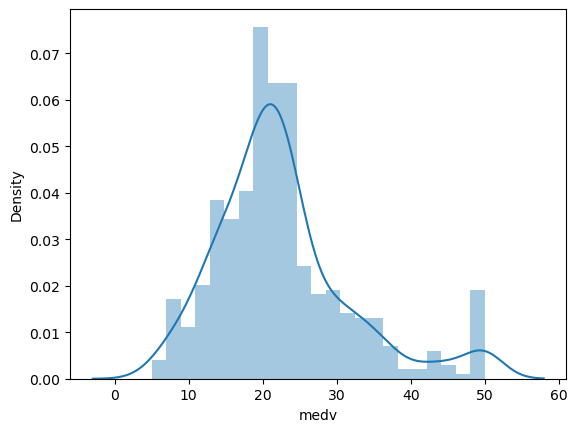

In [11]:
sns.distplot(df['medv'])

<Axes: >

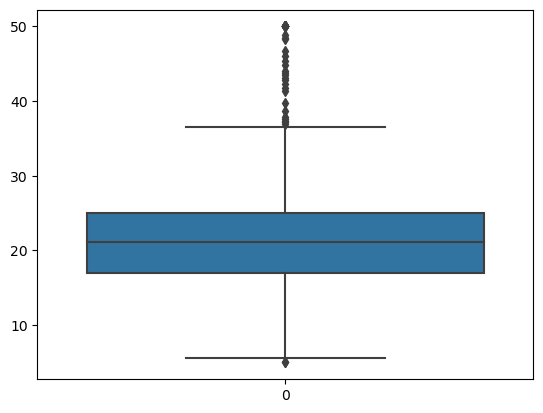

In [12]:
sns.boxplot(df['medv'])

In [13]:
Q1 = df['medv'].quantile(0.25)

In [14]:
Q3 =df['medv'].quantile(0.75)


In [15]:
IQR = Q3-Q1

In [16]:
UpperL = Q3 + 1.5* IQR
lowerL =Q1 - 1.5*IQR

In [17]:
UpperL

36.962500000000006

In [18]:
lowerL

5.0624999999999964

In [22]:
df[df['medv'] > UpperL]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0,0.4450,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
157,1.22358,0.0,19.58,0,0.6050,6.943,97.4,1.8773,5,403,14.7,363.43,4.59,41.3
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
179,0.05780,0.0,2.46,0,0.4880,6.980,58.4,2.8290,3,193,17.8,396.90,5.04,37.2
180,0.06588,0.0,2.46,0,0.4880,7.765,83.3,2.7410,3,193,17.8,395.56,7.56,39.8
182,0.09103,0.0,2.46,0,0.4880,7.155,92.2,2.7006,3,193,17.8,394.12,4.82,37.9


In [29]:
df[(df['medv'] > UpperL) | (df['medv'] < lowerL)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0,0.4450,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
157,1.22358,0.0,19.58,0,0.6050,6.943,97.4,1.8773,5,403,14.7,363.43,4.59,41.3
161,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
179,0.05780,0.0,2.46,0,0.4880,6.980,58.4,2.8290,3,193,17.8,396.90,5.04,37.2
180,0.06588,0.0,2.46,0,0.4880,7.765,83.3,2.7410,3,193,17.8,395.56,7.56,39.8
182,0.09103,0.0,2.46,0,0.4880,7.155,92.2,2.7006,3,193,17.8,394.12,4.82,37.9


In [24]:
df[df['medv'] < lowerL]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


In [31]:
#triming methodf['medv'] < lowerLd
df1 =df[(df['medv'] < UpperL ) & (df['medv'] >lowerL)]

In [32]:
df1.shape

(466, 14)

<Axes: >

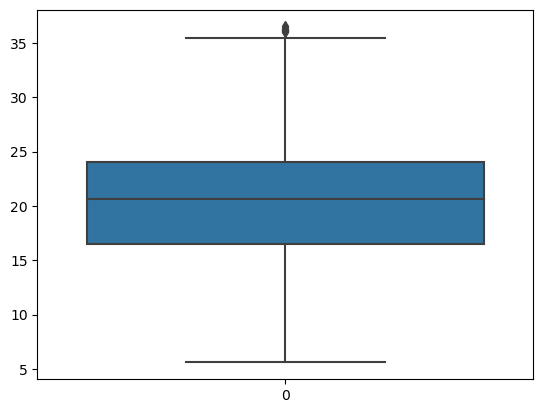

In [87]:
sns.boxplot(df1['medv'])

In [34]:
# capping method 
parth_df = df.copy()

In [35]:
parth_df['medv']=np.where(parth_df['medv'] >UpperL ,
                   UpperL,
                    np.where(parth_df['medv'] < lowerL,
                            lowerL,
                            parth_df['medv'])
                   )


C:\Users\solan\AppData\Local\Temp\ipykernel_191192\2883525105.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['medv'])
C:\Users\solan\AppData\Local\Temp\ipykernel_191192\2883525105.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(parth_df['medv'])


Text(0.5, 1.0, 'after  handling outlier')

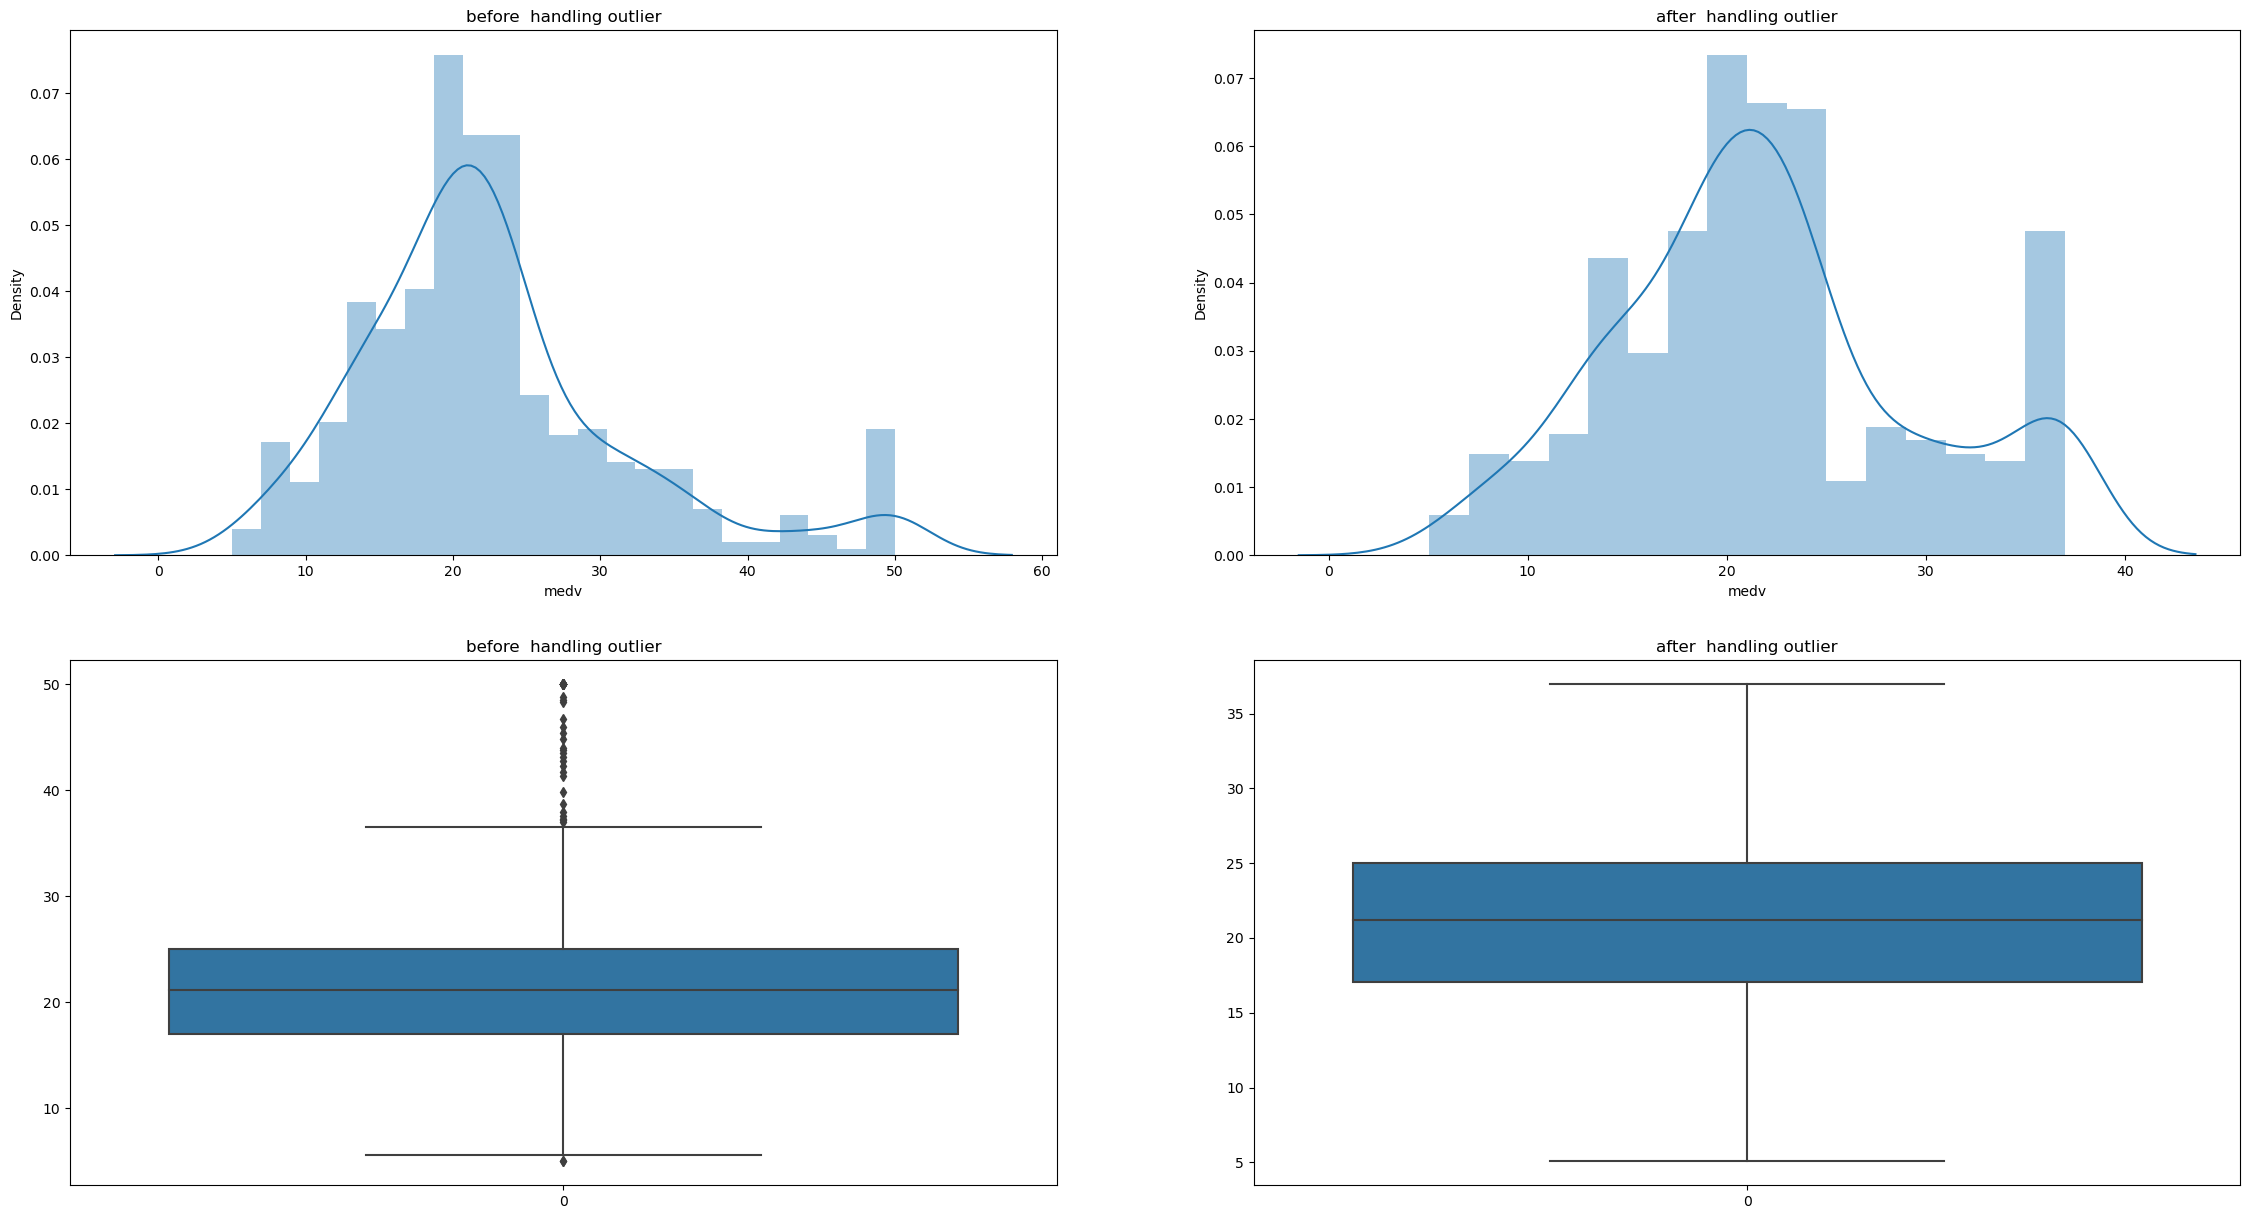

In [36]:
plt.figure(figsize=(28,15))
plt.subplot(2,2,1)
plt.title("before  handling outlier")
sns.distplot(df['medv'])

plt.subplot(2,2,2)
plt.title("after  handling outlier")
sns.distplot(parth_df['medv'])

plt.subplot(2,2,3)
sns.boxplot(df['medv'])
plt.title("before  handling outlier")

plt.subplot(2,2,4)
sns.boxplot(parth_df['medv'])
plt.title("after  handling outlier")

In [101]:
## insights we have completely remove or squezzzed ouliers in our dataset

In [102]:
df.sample(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
35,0.06417,0.0,5.96,0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,9.68,18.9
89,0.05302,0.0,3.41,0,0.489,7.079,63.1,3.4145,2,270,17.8,396.06,5.70,28.7


<Axes: >

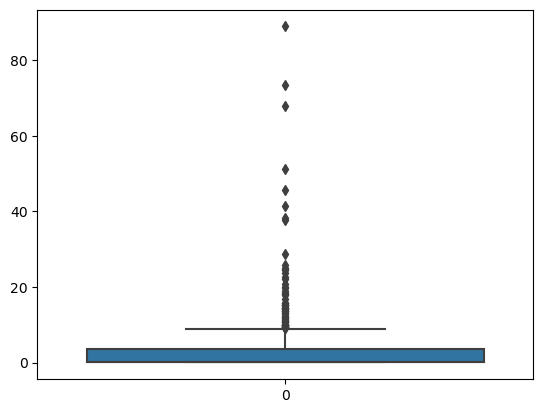

In [103]:
sns.boxplot(df['crim'])

<Axes: >

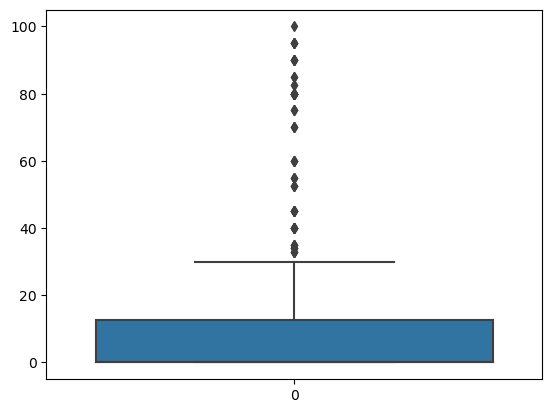

In [121]:
sns.boxplot(df['zn'])  

<Axes: >

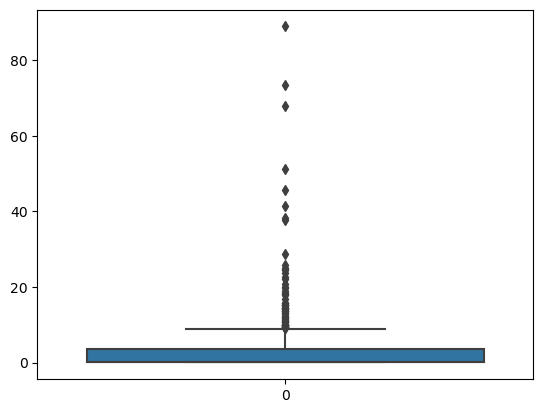

In [105]:
sns.boxplot(df['indus']) 

<Axes: >

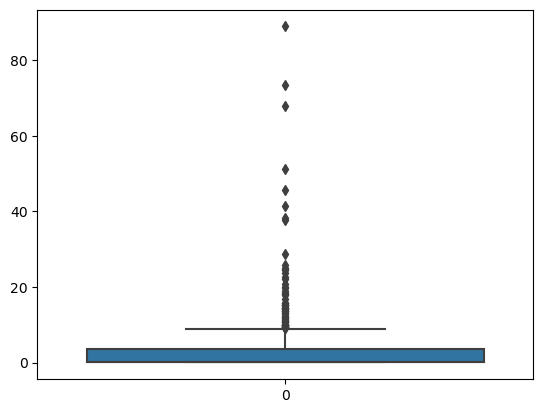

In [106]:
sns.boxplot(df['nox'])  

<Axes: >

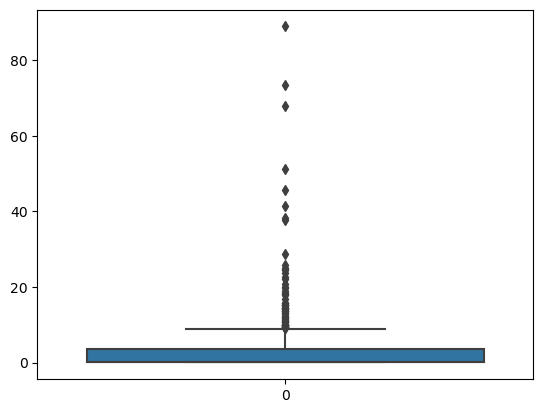

In [107]:
sns.boxplot(df['crim']) 

<Axes: >

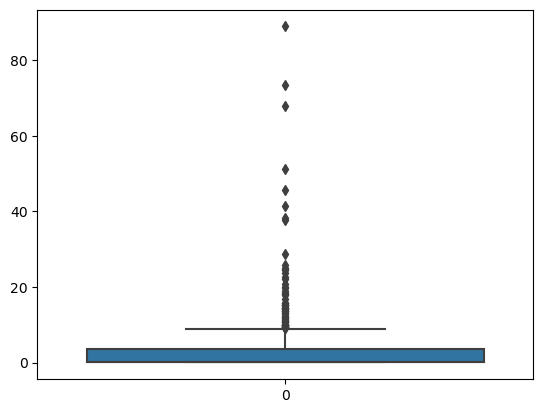

In [108]:
sns.boxplot(df['rm'])

<Axes: >

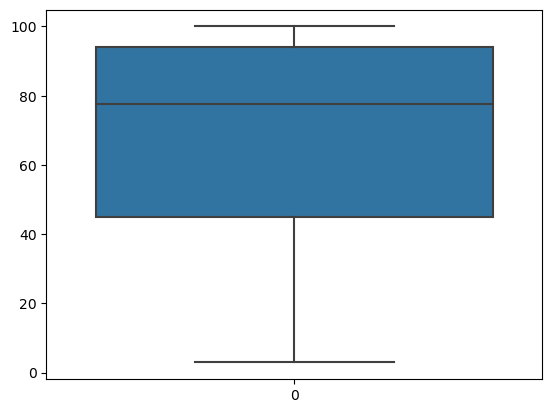

In [110]:
sns.boxplot(df['age'])

<Axes: >

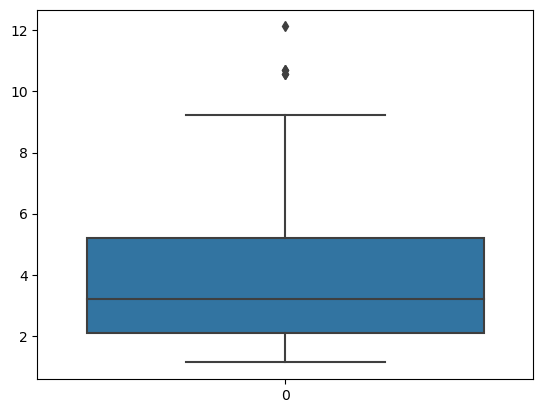

In [111]:
sns.boxplot(df['dis'])

<Axes: >

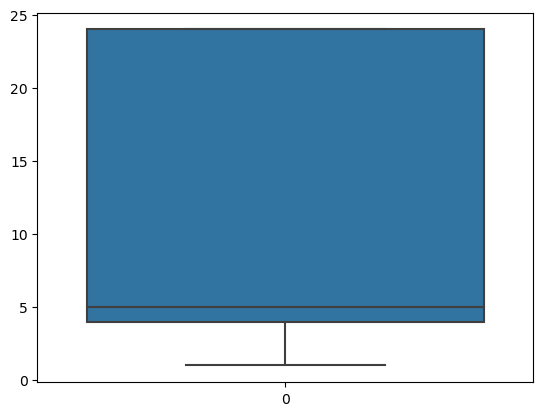

In [115]:
sns.boxplot(df['rad'])

<Axes: >

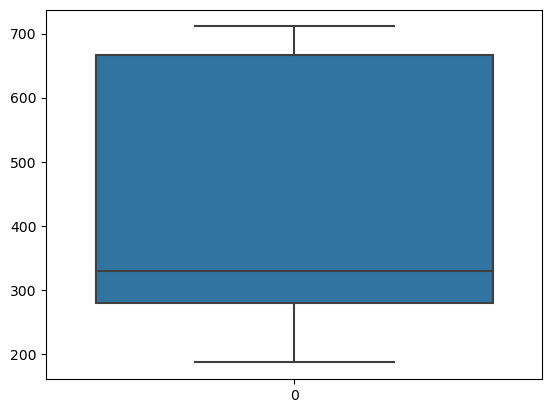

In [116]:
sns.boxplot(df['tax'])

<Axes: >

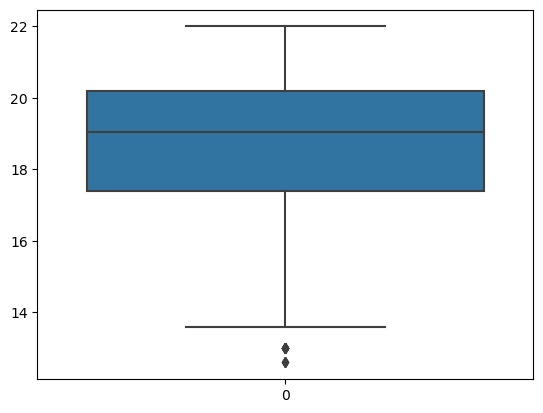

In [117]:
sns.boxplot(df['ptratio'])

<Axes: >

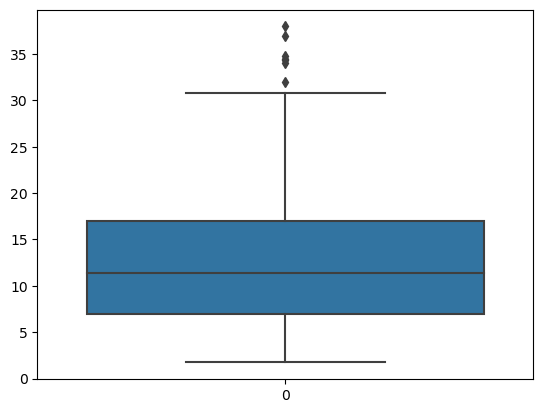

In [118]:
sns.boxplot(df['lstat'])

<Axes: >

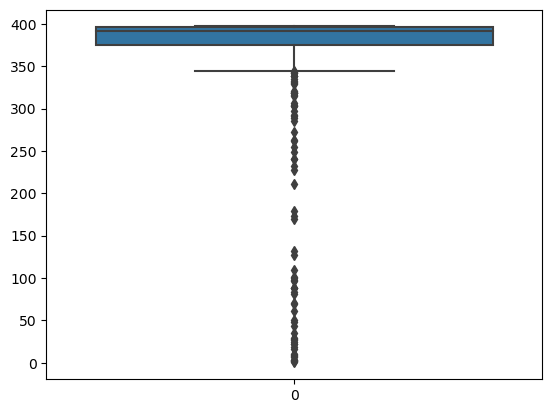

In [119]:
sns.boxplot(df['b'])

In [ ]:
#outlier are present in b,lstat , ptratio ,dis ,rm, crim, nox, indus, zn

In [122]:
# no need to Data Encoding bcz all the columns in int and float type

In [38]:
X =parth_df.drop(columns ='medv' )
Y = parth_df['medv']

In [57]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train , Y_test =train_test_split(X , Y , test_size =0.20 ,random_state=43)

In [58]:
from sklearn.preprocessing import StandardScaler
SD=StandardScaler()

In [59]:
SD.fit(X_train)

StandardScaler()

In [60]:
X_train_scaled = SD.transform(X_train)
X_test_scaled = SD.transform(X_test)

In [61]:
SD.mean_

array([3.30005666e+00, 1.14294554e+01, 1.09226733e+01, 6.68316832e-02,
       5.51583168e-01, 6.28808416e+00, 6.76905941e+01, 3.81580322e+00,
       9.37871287e+00, 4.06957921e+02, 1.84284653e+01, 3.58337748e+02,
       1.22574010e+01])

In [63]:
X_train_scaled

array([[ 4.52581407, -0.49169983,  1.06329337, ...,  0.81464999,
         0.43532361,  2.69708355],
       [-0.24210115, -0.49169983,  1.28254968, ..., -1.71455538,
         0.06741988, -0.7160898 ],
       [-0.41398831,  0.04605526, -0.45224181, ..., -1.48462762,
         0.36307495,  0.50794478],
       ...,
       [-0.4215159 ,  2.94993276, -1.07890005, ..., -0.93280099,
         0.41590678, -0.44244745],
       [-0.40445681, -0.49169983, -0.52483343, ...,  0.53873668,
         0.43532361, -0.74404251],
       [-0.38205612, -0.49169983, -0.52483343, ...,  0.53873668,
         0.43532361, -0.90293162]])

In [64]:
X_train_scaled =pd.DataFrame(X_train_scaled , columns=X_train.columns)
X_test_scaled =pd.DataFrame(X_test_scaled ,columns =X_test.columns)

In [65]:
X_train_scaled

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,4.525814,-0.491700,1.063293,-0.267615,1.247460,-1.191832,1.129465,-1.138879,1.688013,1.552020,0.814650,0.435324,2.697084
1,-0.242101,-0.491700,1.282550,-0.267615,2.817626,0.316718,1.129465,-1.003606,-0.505518,-0.023713,-1.714555,0.067420,-0.716090
2,-0.413988,0.046055,-0.452242,-0.267615,-0.243315,-0.569573,-1.002959,0.800522,-0.505518,-0.574920,-1.484628,0.363075,0.507945
3,-0.399310,-0.491700,2.491422,-0.267615,0.506483,-1.705624,1.059549,-0.975846,-0.620967,1.821632,0.768664,-0.450513,2.563205
4,-0.215810,-0.491700,1.624767,-0.267615,0.638800,-1.811236,1.129465,-1.163456,-0.620967,0.179994,1.274506,0.435324,3.259080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.418186,1.229116,-0.668535,3.736705,-0.922545,0.767713,-1.401478,0.512596,-0.620967,-0.916429,-0.380974,0.396377,-1.191286
400,-0.419023,0.927974,-1.295193,-0.267615,-0.702016,0.468001,-0.335266,-0.218259,-0.274620,-1.108153,-0.013090,0.395361,-0.489526
401,-0.421516,2.949933,-1.078900,-0.267615,-1.407708,-0.588126,-1.698619,2.645972,-0.967314,-0.550955,-0.932801,0.415907,-0.442447
402,-0.404457,-0.491700,-0.524833,-0.267615,-0.516771,0.196833,-0.538021,0.354753,-0.505518,-0.718714,0.538737,0.435324,-0.744043


In [66]:
X_train.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.300057,11.429455,10.922673,0.066832,0.551583,6.288084,67.690594,3.815803,9.378713,406.957921,18.428465,358.337748,12.257401
std,7.754451,23.273604,6.758460,0.250040,0.113504,0.701542,28.641416,2.045070,8.672574,167.113387,2.177292,88.692793,6.805622
min,0.006320,0.000000,0.740000,0.000000,0.392000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.078832,0.000000,4.950000,0.000000,0.448000,5.888750,43.250000,2.130275,4.000000,278.500000,16.975000,376.560000,6.710000
50%,0.224635,0.000000,8.560000,0.000000,0.532000,6.211000,76.600000,3.275900,5.000000,330.000000,18.850000,391.815000,11.235000
75%,3.241270,12.500000,18.100000,0.000000,0.624000,6.616750,93.825000,5.214600,24.000000,666.000000,20.200000,396.285000,16.367500
max,73.534100,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,36.980000


In [67]:
np.round(X_train.describe())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0
mean,3.0,11.0,11.0,0.0,1.0,6.0,68.0,4.0,9.0,407.0,18.0,358.0,12.0
std,8.0,23.0,7.0,0.0,0.0,1.0,29.0,2.0,9.0,167.0,2.0,89.0,7.0
min,0.0,0.0,1.0,0.0,0.0,4.0,3.0,1.0,1.0,188.0,13.0,0.0,2.0
25%,0.0,0.0,5.0,0.0,0.0,6.0,43.0,2.0,4.0,278.0,17.0,377.0,7.0
50%,0.0,0.0,9.0,0.0,1.0,6.0,77.0,3.0,5.0,330.0,19.0,392.0,11.0
75%,3.0,12.0,18.0,0.0,1.0,7.0,94.0,5.0,24.0,666.0,20.0,396.0,16.0
max,74.0,95.0,28.0,1.0,1.0,9.0,100.0,11.0,24.0,711.0,22.0,397.0,37.0


In [68]:
np.round(X_train_scaled.describe() , 1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0,404.0
mean,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-0.4,-0.5,-1.5,-0.3,-1.4,-3.9,-2.3,-1.3,-1.0,-1.3,-2.7,-4.0,-1.5
25%,-0.4,-0.5,-0.9,-0.3,-0.9,-0.6,-0.9,-0.8,-0.6,-0.8,-0.7,0.2,-0.8
50%,-0.4,-0.5,-0.4,-0.3,-0.2,-0.1,0.3,-0.3,-0.5,-0.5,0.2,0.4,-0.2
75%,-0.0,0.0,1.1,-0.3,0.6,0.5,0.9,0.7,1.7,1.6,0.8,0.4,0.6
max,9.1,3.6,2.5,3.7,2.8,3.6,1.1,3.4,1.7,1.8,1.6,0.4,3.6


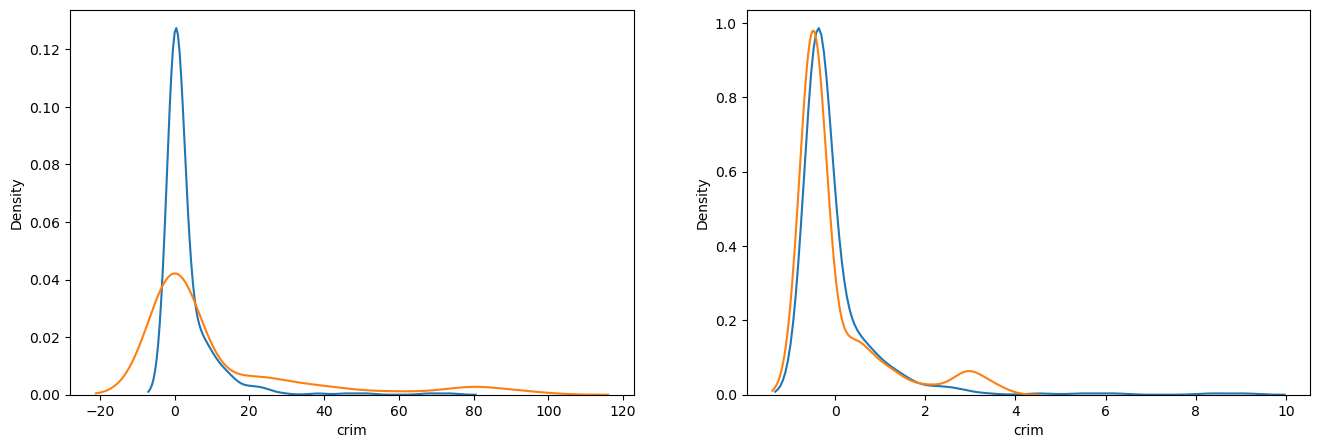

In [69]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(X_train['crim'])
sns.kdeplot(X_train['zn'])
plt.subplot(1,2,2)
sns.kdeplot(X_train_scaled['crim'])
sns.kdeplot(X_train_scaled['zn'])
plt.show()

In [70]:
# fig , (ax1, ax2) =plt.subplots(ncols=2,figsize=(12,5))
# #before scaling
# ax1.set_title('BEFORE SCALING')
# sns.kdeplot(X_train['crim'], ax=ax1)
# sns.kdeplot(X_train['zn'],ax =ax1)
# #after scaling
# ax2.set_title('AFTER SCALING')
# sns.kdeplot(X_train_scaled['crim'], ax=ax2)
# sns.kdeplot(X_train_scaled['zn'], ax=ax2)
# plt.show()

In [71]:
#comparision Distribution

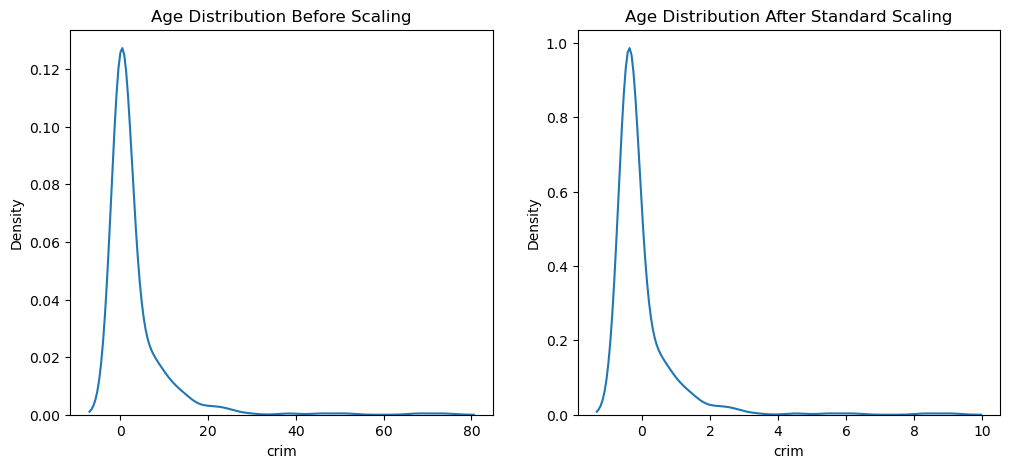

In [72]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['crim'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['crim'], ax=ax2)
plt.show()

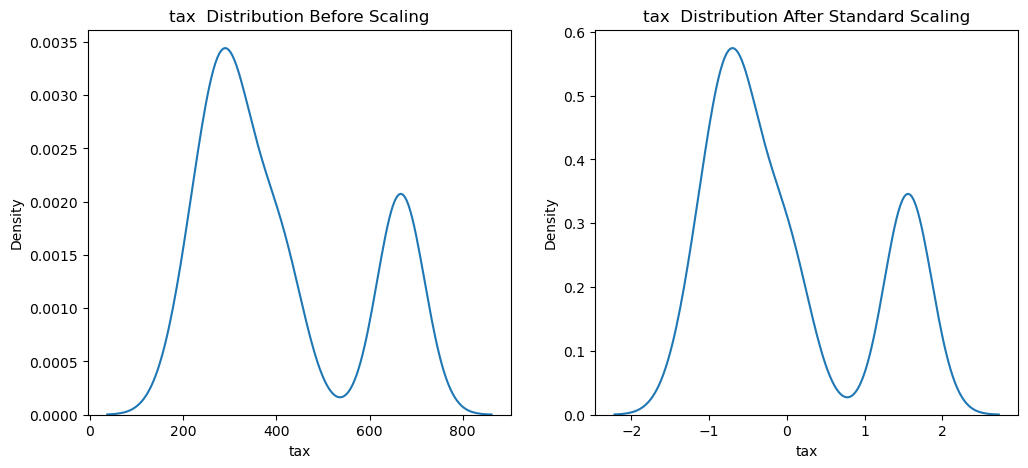

In [73]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('tax  Distribution Before Scaling')
sns.kdeplot(X_train['tax'], ax=ax1)

# after scaling
ax2.set_title('tax  Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['tax'], ax=ax2)
plt.show()

In [74]:
from sklearn.linear_model import LinearRegression
LR =LinearRegression()

In [75]:
LR.fit(X_train_scaled , Y_train)

LinearRegression()

In [76]:
y_pred =LR.predict(X_test_scaled)

In [77]:
from sklearn.metrics import mean_squared_error

In [78]:
mse =mean_squared_error(Y_test,y_pred)

In [79]:
mse

12.918119237165348

In [80]:
from sklearn.metrics import r2_score

In [81]:
r2 =r2_score(Y_test,y_pred)

In [82]:
r2

0.8030491777133641